## 说明

请按照填空顺序编号分别完成 参数优化，不同基函数的实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    """载入数据。"""
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        return np.asarray(xs), np.asarray(ys)

## 不同的基函数 (basis function)的实现 填空顺序 2

请分别在这里实现“多项式基函数”以及“高斯基函数”

其中以及训练集的x的范围在0-25之间

In [2]:
def identity_basis(x):
    ret = np.expand_dims(x, axis=1) #就是在第“axis”维，加一个维度出来，原先的“维”，推到右边去
    #比如我们设置axis为0，那A矩阵的大小就变成了（1,2,3），就从2*3的二维矩阵变成了一个1*2 *3的三维矩阵
    #如果设置axis为1，矩阵大小就变成了（2,1,3），变成了一个2*1*3的三维矩阵
    return ret

def multinomial_basis(x, feature_num=10):
    '''多项式基函数'''
    x = np.expand_dims(x, axis=1) # shape(N, 1)
    #==========
    #todo '''请实现多项式基函数'''
    #==========
    feat = [x]
    for i in range(2, feature_num+1):
        feat.append(x**i)
    ret = np.concatenate(feat, axis=1)
    return ret

def gaussian_basis(x, feature_num=10):
    '''高斯基函数'''
    #==========
    #todo '''请实现高斯基函数'''
    #==========
    centers = np.linspace(0, 25, feature_num)
    width = 1.0 * (centers[1] - centers[0])
    x = np.expand_dims(x, axis=1)
    x = np.concatenate([x]*feature_num, axis=1)
    
    out = (x-centers)/width
    ret = np.exp(-0.5 * out ** 2)
    return ret

## 返回一个训练好的模型 填空顺序 1 用最小二乘法进行模型优化 
## 填空顺序 3 用梯度下降进行模型优化
> 先完成最小二乘法的优化 (参考书中第二章 2.3中的公式)

> 再完成梯度下降的优化   (参考书中第二章 2.3中的公式)

在main中利用训练集训练好模型的参数，并且返回一个训练好的模型。

计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w

In [19]:
def main(x_train, y_train):
    """
    训练模型，并返回从x到y的映射。
    
    """
    
    basis_func = gaussian_basis                             # shape(N, 1)的函数
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1)    # shape(N,1)大小的全1 array
    phi1 = basis_func(x_train)                              # 将x_train的shape转换为(N, 1)
    phi = np.concatenate([phi0, phi1], axis=1)              # phi.shape=(300,2) phi是增广特征向量的转置
    
    
    #==========
    #todo '''计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w'''
    #==========
    
    #最小二乘法
    w = np.dot(np.linalg.pinv(phi), y_train)      # np.linalg.pinv(phi)求phi的伪逆矩阵(phi不是列满秩) w.shape=[2,1]
    
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)
        return y

    return f

梯度下降方法

In [17]:
def main(x_train, y_train):
    """
    训练模型，并返回从x到y的映射。
    """
    basis_func = identity_basis
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1)      #phi0.shape=(300,1)
    phi1 = basis_func(x_train)                                #phi1.shape=(300,1)
 
    phi = np.concatenate([phi0, phi1], axis=1)                #phi.shape=(300,2)phi是增广特征向量的转置
 
    ### START CODE HERE ###
    #梯度下降法
    def dJ(theta, phi, y):
        return phi.T.dot(phi.dot(theta)-y)*2.0/len(phi)
 
    def gradient(phi, y, initial_theta, eta=0.001, n_iters=10000):
        w = initial_theta
 
        for i in range(n_iters):
            gradient = dJ(w, phi, y)                #计算梯度
            w = w - eta *gradient                   #更新w
 
        return w
 
    initial_theta = np.zeros(phi.shape[1])
    w = gradient(phi, y_train, initial_theta)
    ### END CODE HERE ###
 
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)
        return y
 
    return f

## 评估结果 
> 没有需要填写的代码，但是建议读懂

(300,)
(200,)
训练集预测值与真实值的标准差：0.4
预测值与真实值的标准差：0.4


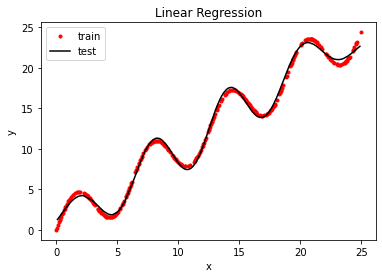

In [20]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main(x_train, y_train)

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
#     plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()